<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/Problema_de_inventarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t as Tt

In [ ]:
def demanda():
  r = random()
  if r < 0.01: return 35
  elif 0.010 <= r and r < 0.025: return 36
  elif 0.025 <= r and r < 0.045: return 37
  elif 0.045 <= r and r < 0.065: return 38
  elif 0.065 <= r and r < 0.087: return 39
  elif 0.087 <= r and r < 0.110: return 40
  elif 0.110 <= r and r < 0.135: return 41
  elif 0.135 <= r and r < 0.162: return 42
  elif 0.162 <= r and r < 0.190: return 43
  elif 0.190 <= r and r < 0.219: return 44
  elif 0.219 <= r and r < 0.254: return 45
  elif 0.254 <= r and r < 0.299: return 46
  elif 0.299 <= r and r < 0.359: return 47
  elif 0.359 <= r and r < 0.424: return 48
  elif 0.424 <= r and r < 0.494: return 49
  elif 0.494 <= r and r < 0.574: return 50
  elif 0.574 <= r and r < 0.649: return 51
  elif 0.649 <= r and r < 0.719: return 52
  elif 0.719 <= r and r < 0.784: return 53
  elif 0.784 <= r and r < 0.844: return 54
  elif 0.844 <= r and r < 0.894: return 55
  elif 0.894 <= r and r < 0.934: return 56
  elif 0.934 <= r and r < 0.964: return 57
  elif 0.964 <= r and r < 0.980: return 58
  elif 0.980 <= r and r < 0.995: return 59
  else: return 60

def t():
  r = random()
  if r < 0.3: return 1
  elif 0.03 <= r and r < 0.7: return 2
  else: return 3

def fact_est(n):
  return factores_estacionales[n - 1]


factores_estacionales = (1.2, 1, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4)
meses = ("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")

In [ ]:
def inventario(inventario_0, recompra, compra, n):
  costo_ordenar = []
  costo_llevar_inventario = []
  costo_faltante = []
  costo_total = []

  for i in range(n):
    inventario_inicial = np.zeros(12, dtype=int)
    inventario_final = np.zeros(12, dtype=int)
    demanda_ajustada = np.zeros(12, dtype=int)
    faltante = np.zeros(12, dtype=int)
    orden = np.zeros(12, dtype=int)
    tiempo_entrega = np.zeros(12, dtype=int)
    IMP = np.zeros(12, dtype=int)

    inventario_inicial[0] = inventario_0
    demanda_ajustada[0] = round(demanda()*fact_est(1), 0)
    inventario_final[0] = inventario_0 - demanda_ajustada[0]
    IMP[0] = (inventario_inicial[0] + inventario_final[0])/2

    if inventario_final[0] <= recompra:
      tiempo = t()
      perdiodo_sin_entrega = 0
      tiempo_entrega[0] = tiempo
      orden[0] = 1
      inventario_inicial[1 + tiempo] += compra

    for mes in range(1, 12):
      inventario_inicial[mes] += inventario_final[mes - 1]
      demanda_ajustada[mes] += round(demanda()*fact_est(mes + 1), 0)

      if inventario_inicial[mes] < demanda_ajustada[mes]:
        faltante[mes] = demanda_ajustada[mes] - inventario_inicial[mes]
        IMP[mes] = (inventario_inicial[mes]**2)/(2*demanda_ajustada[mes])
      else:
        IMP[mes] = (inventario_inicial[mes] + inventario_final[mes])/2
        inventario_final[mes] = inventario_inicial[mes] - demanda_ajustada[mes]

      if sum(orden) == 0 and inventario_final[mes] <= recompra:
        tiempo = t()
        perdiodo_sin_entrega = 0
        tiempo_entrega[mes] = tiempo
        orden[mes] = 1
        inventario_inicial[1 + mes + tiempo] += compra

      elif inventario_final[mes] <= recompra and tiempo <= perdiodo_sin_entrega:
        perdiodo_sin_entrega = 0
        orden[mes] += 1
        tiempo = t()
        tiempo_entrega[mes] = tiempo

        if 1 + mes + tiempo <= 11:
          inventario_inicial[1 + mes + tiempo] += compra

      else:
        perdiodo_sin_entrega += 1

    if i == 0:
      data = pd.DataFrame({
          'Mes': meses,
          'Inventario Inicial': inventario_inicial,
          'Demanda Ajustada': demanda_ajustada,
          'Inventario Final': inventario_final,
          'Faltante': faltante,
          'Orden': orden,
          #'Tiempo de Entrega': tiempo_entrega,
          'IMP': IMP
      })

    costo_ordenar.append(sum(orden)*100)
    costo_llevar_inventario.append(sum(IMP)*20/12)
    costo_faltante.append(sum(faltante)*50)
    costo_total.append(costo_ordenar[i] + costo_llevar_inventario[i] + costo_faltante[i])

  costos = pd.DataFrame({
      'CPxO': costo_ordenar,
      'CPxLI': costo_llevar_inventario,
      'CPF': costo_faltante,
      'CPT': costo_total
  })

  return data, costos

,Mes,Inventario Inicial,Demanda Ajustada,Inventario Final,Faltante,Orden,IMP
0,Enero,150,53,97,0,1,123
1,Febrero,97,49,48,0,0,48
2,Marzo,48,49,0,1,0,23
3,Abril,0,38,0,38,0,0
4,Mayo,200,40,160,0,0,100
5,Junio,160,34,126,0,0,80
6,Julio,126,41,85,0,1,63
7,Agosto,85,49,36,0,0,42
8,Septiembre,36,52,0,16,0,12
9,Octubre,200,52,148,0,0,100


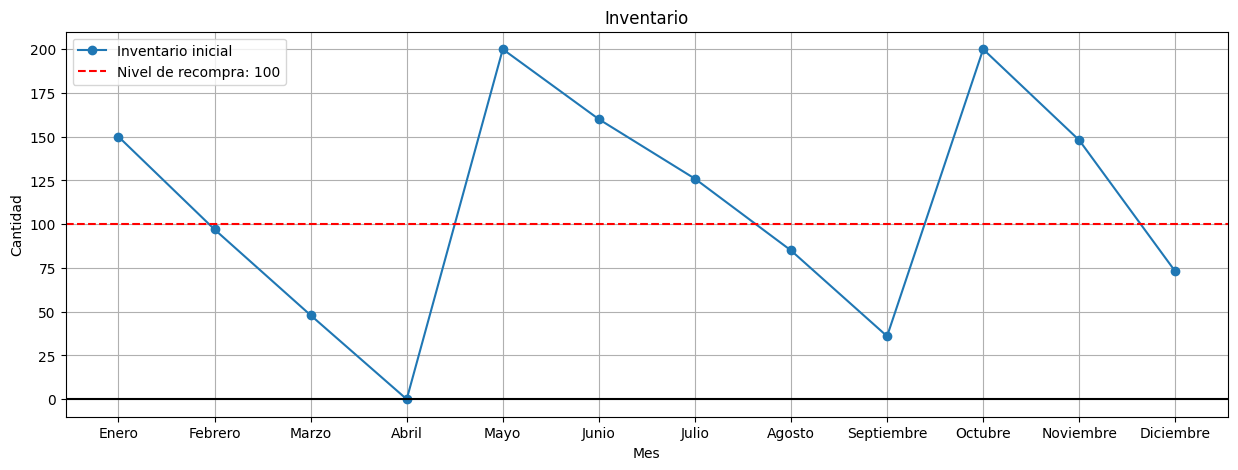

Costo promedio de ordenar: $300.00
Costo promedio de llevar inventario: $1,168.33
Costo promedio de faltante: $2,750.00
Costo promedio de total: $4,218.33


In [ ]:
inventario_0 = 150
recompra = 100
compra = 200

data, costos = inventario(inventario_0, recompra, compra, 1)

display(data)

plt.figure(figsize=(15, 5))
plt.plot(list(data["Inventario Inicial"]), marker='o', label = "Inventario inicial")
#plt.plot(inventario_final, marker='o', label = "Inventario final")
plt.axhline(y = recompra, color = 'r', linestyle = '--', label = f"Nivel de recompra: {recompra}")
plt.axhline(y = 0, color = "k")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.title("Inventario")
plt.legend(loc = "best")
plt.grid(True)
plt.xticks(range(12), meses)
plt.show()


for nombre, valor in zip(
    ["ordenar", "llevar inventario", "faltante", "total"],
    [costos[col].mean() for col in ["CPxO", "CPxLI", "CPF", "CPT"]]):
    print(f"Costo promedio de {nombre:}: ${valor:,.2f}")

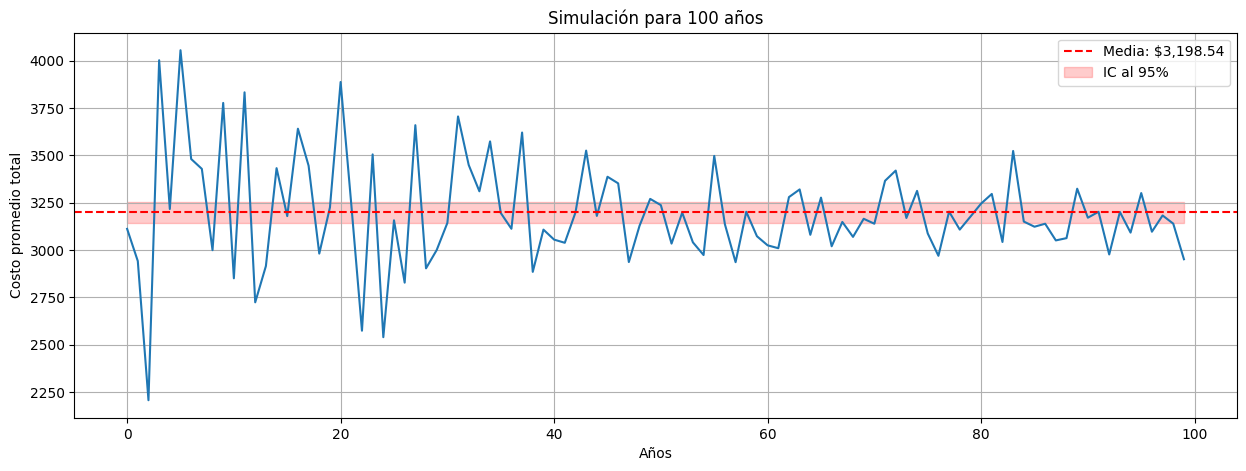

In [ ]:
n = 100
x = []
for i in range(1, n + 1):
  _, costos = inventario(inventario_0, recompra, compra, i)
  x.append(np.mean(costos["CPT"]))


mu = np.mean(x)
s = np.std(x, ddof=1)
alpha = 0.05
t_critico = Tt.ppf(1 - alpha/2, df=n-2)
E = t_critico*s/np.sqrt(n)


plt.figure(figsize=(15, 5))
plt.plot(x)
plt.axhline(y = mu, color = 'r', linestyle = '--', label = f"Media: ${mu:,.2f}")
plt.fill_between(range(n), mu - E, mu + E, color = "r", alpha = 0.2, label = "IC al 95%")
plt.xlabel("Años")
plt.ylabel("Costo promedio total")
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.title(f"Simulación para {n} años")
plt.legend(loc = "best")
plt.grid(True)
plt.show()

In [ ]:
print(f"IC = [{mu - E}, {mu + E}]")

IC = [4174.176431621592, 4192.348002569772]
